# Data Preprocessing Assignment

## 1. Importing required packages

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## 2. Loading the dataset

In [42]:
data=pd.read_csv('./Churn_Modelling.csv')
df=data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.shape

(10000, 14)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Exploration of categorical columns

In [45]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [46]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [47]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [48]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [49]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

## 4.  Perform Below Visualisation

### Univariate Analysis

Catergorical columns

<AxesSubplot:xlabel='Tenure', ylabel='count'>

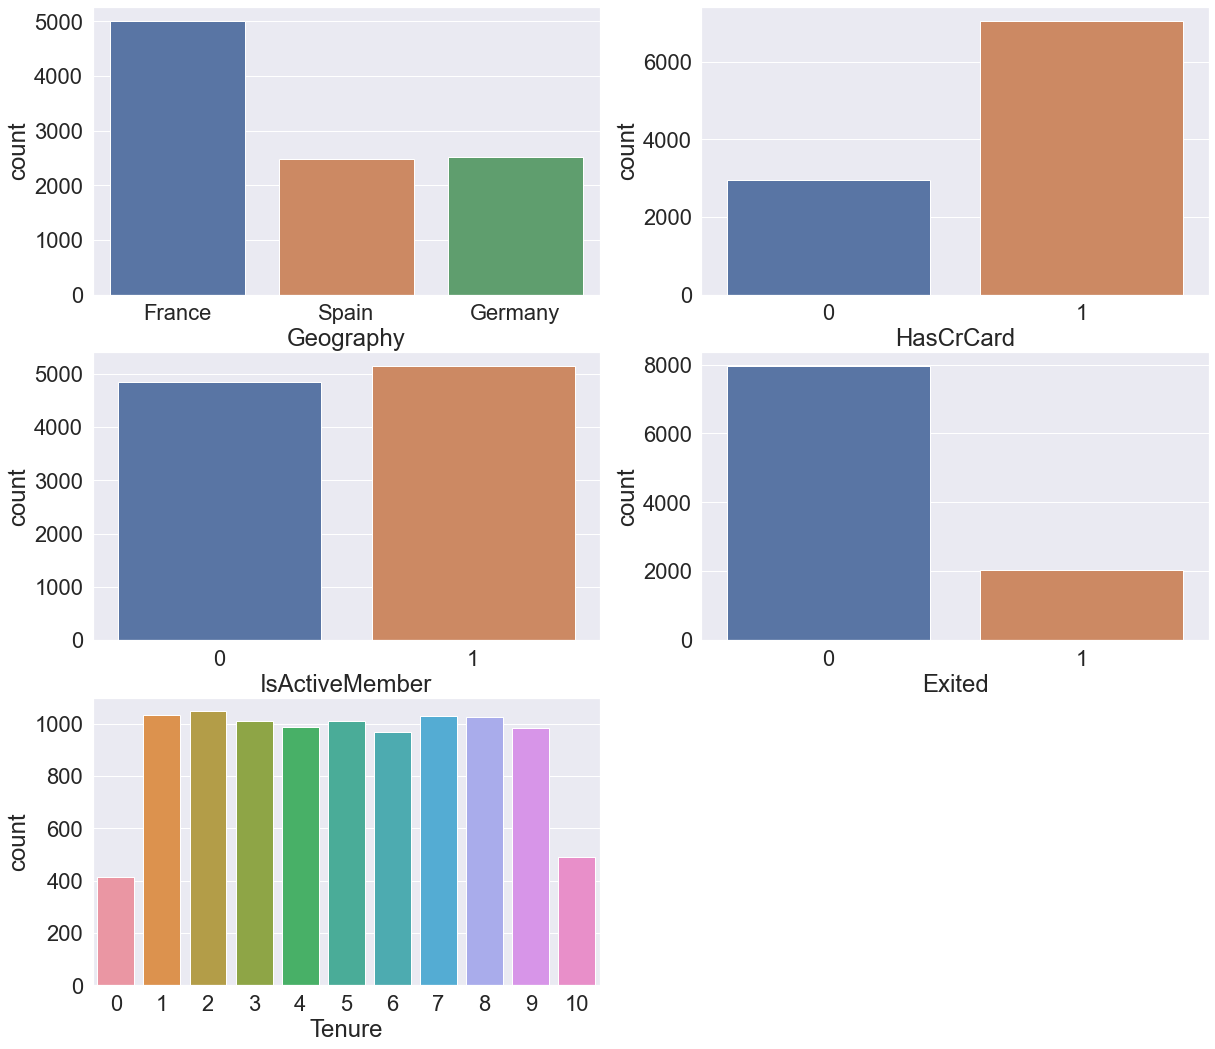

In [50]:
plt.figure(figsize=(20,18))
sns.set_theme(font_scale=2)
plt.subplot(3,2,1)
sns.countplot(data=df,x='Geography')
plt.subplot(3,2,2)
sns.countplot(data=df,x='HasCrCard')
plt.subplot(3,2,3)
sns.countplot(data=df,x='IsActiveMember')
plt.subplot(3,2,4)
sns.countplot(data=df,x='Exited')
plt.subplot(3,2,5)
sns.countplot(data=df,x='Tenure')

Numerical columns visualization

<AxesSubplot:xlabel='Age', ylabel='Count'>

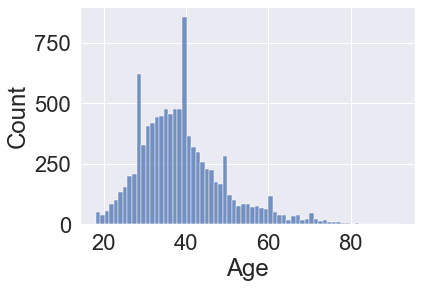

In [51]:
sns.histplot(df.Age)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

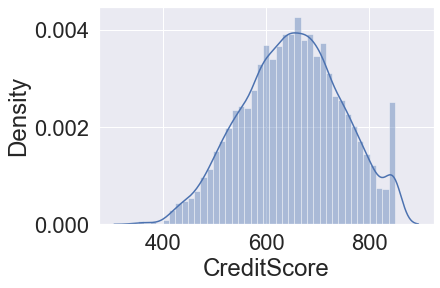

In [52]:
sns.distplot(df.CreditScore)

Here there is no need of `RowNumber` column as it is 100% distinct it does'nt correlate with any other columns

In [53]:
df=df.drop(columns=['RowNumber'])
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


array([[<AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>],
       [<AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

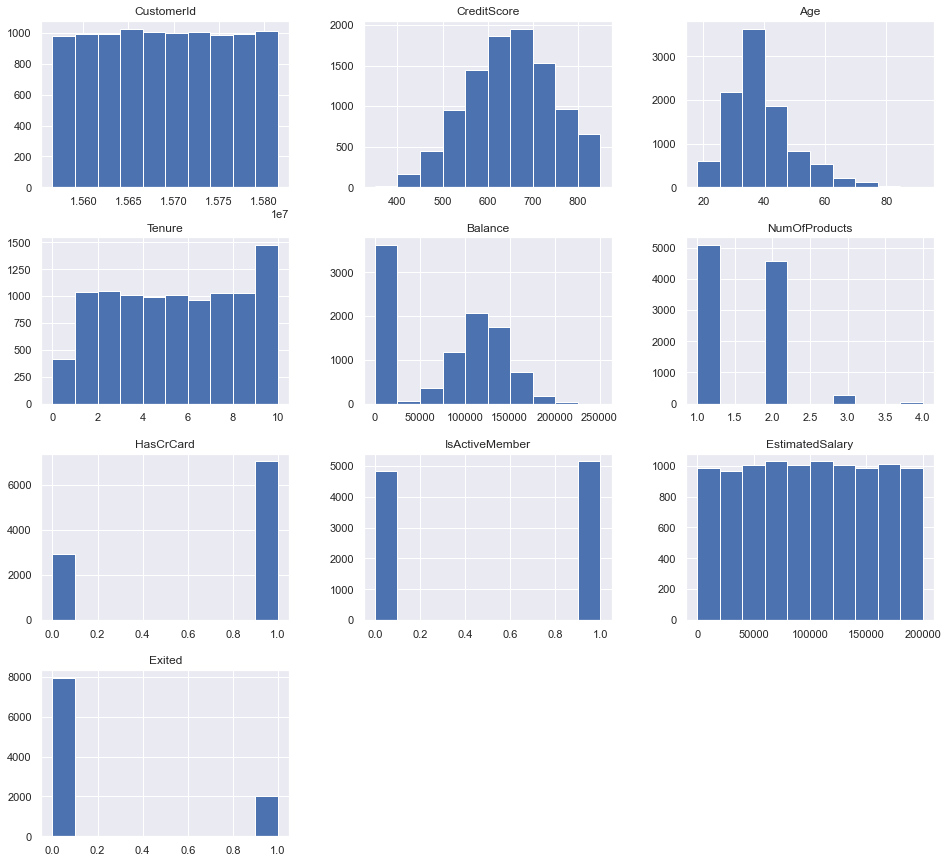

In [54]:
sns.set_theme(font_scale=1)
df.hist(figsize=(16,15))

### Bivariate Analysis

<AxesSubplot:xlabel='Geography', ylabel='count'>

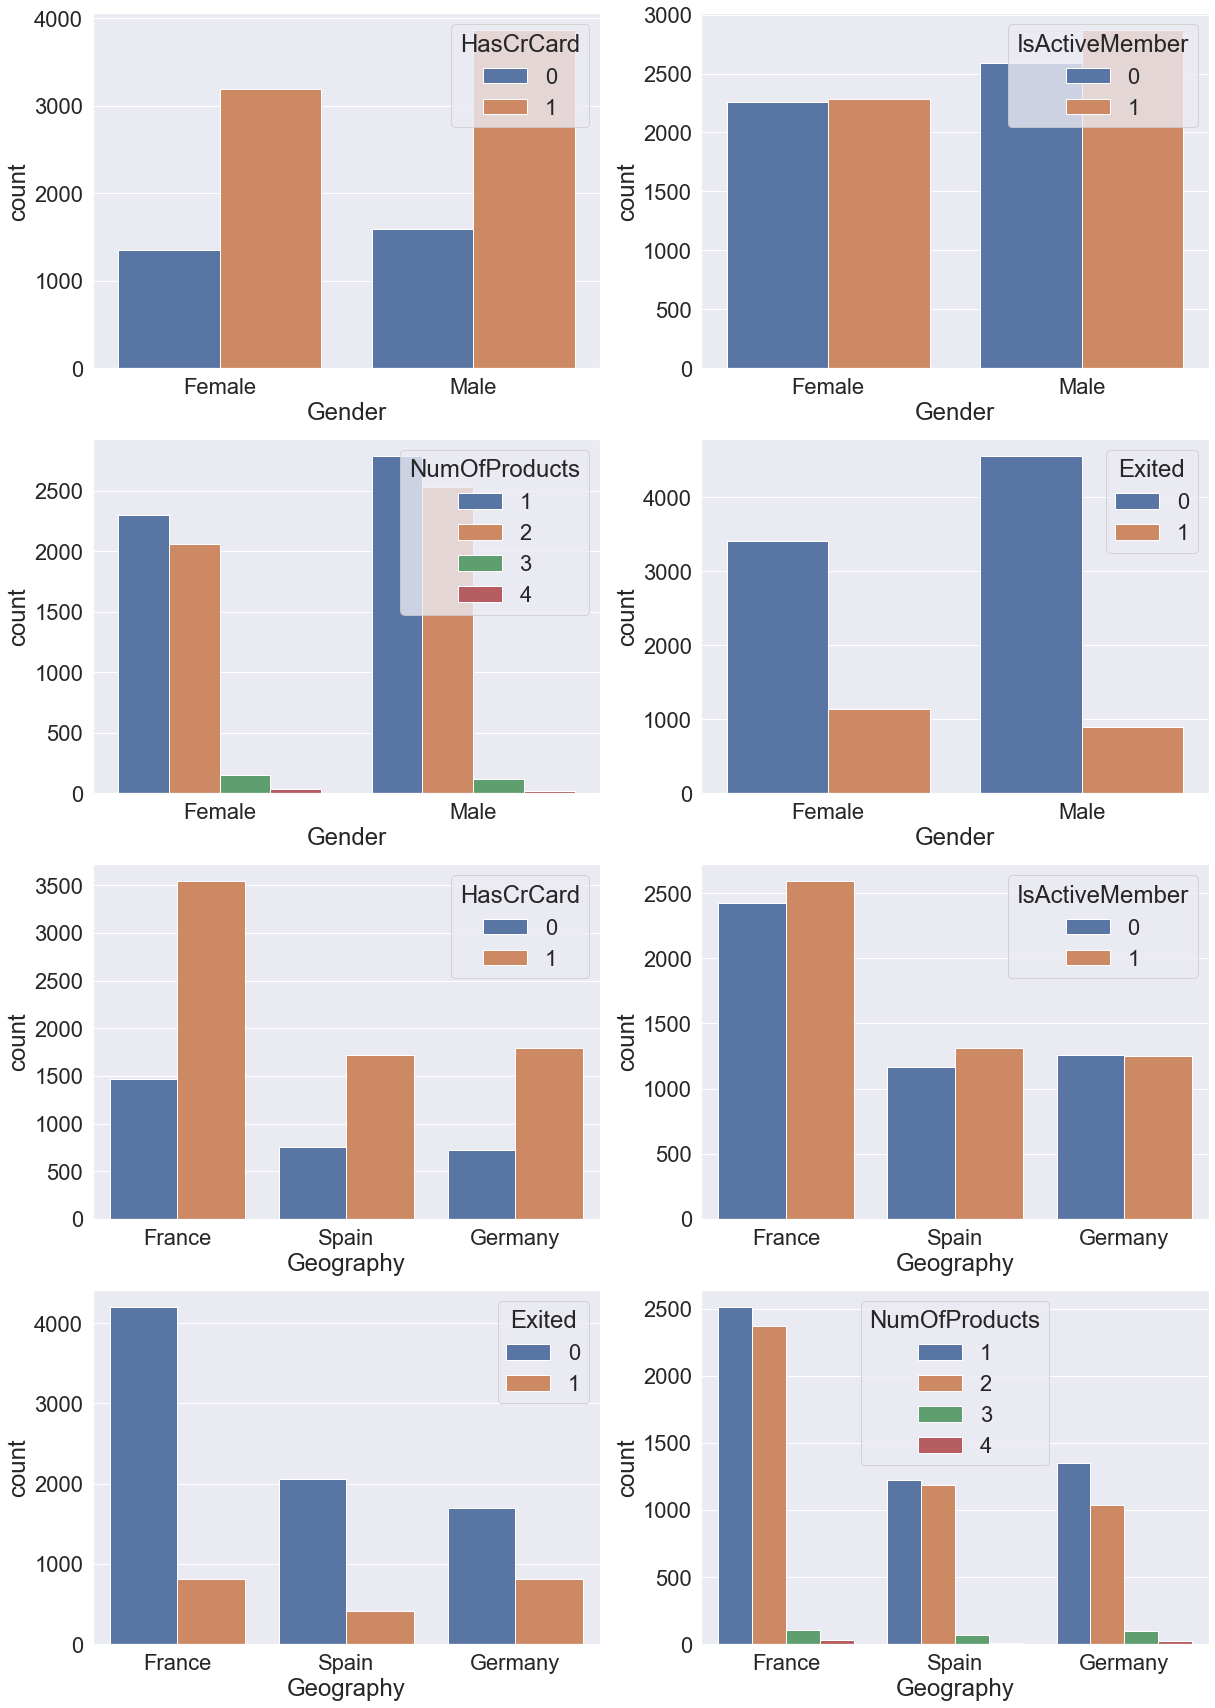

In [55]:
plt.figure(figsize=(20,30))
sns.set_theme(font_scale=2)
plt.subplot(4,2,1)
sns.countplot(data=df,x='Gender',hue='HasCrCard')
plt.subplot(4,2,2)
sns.countplot(data=df,x='Gender',hue='IsActiveMember')
plt.subplot(4,2,3)
sns.countplot(data=df,x='Gender',hue='NumOfProducts')
plt.subplot(4,2,4)
sns.countplot(data=df,x='Gender',hue='Exited')
plt.subplot(4,2,5)
sns.countplot(data=df,x='Geography',hue='HasCrCard')
plt.subplot(4,2,6)
sns.countplot(data=df,x='Geography',hue='IsActiveMember')
plt.subplot(4,2,7)
sns.countplot(data=df,x='Geography',hue='Exited')
plt.subplot(4,2,8)
sns.countplot(data=df,x='Geography',hue='NumOfProducts')


### Multivariate Analysis

In [56]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

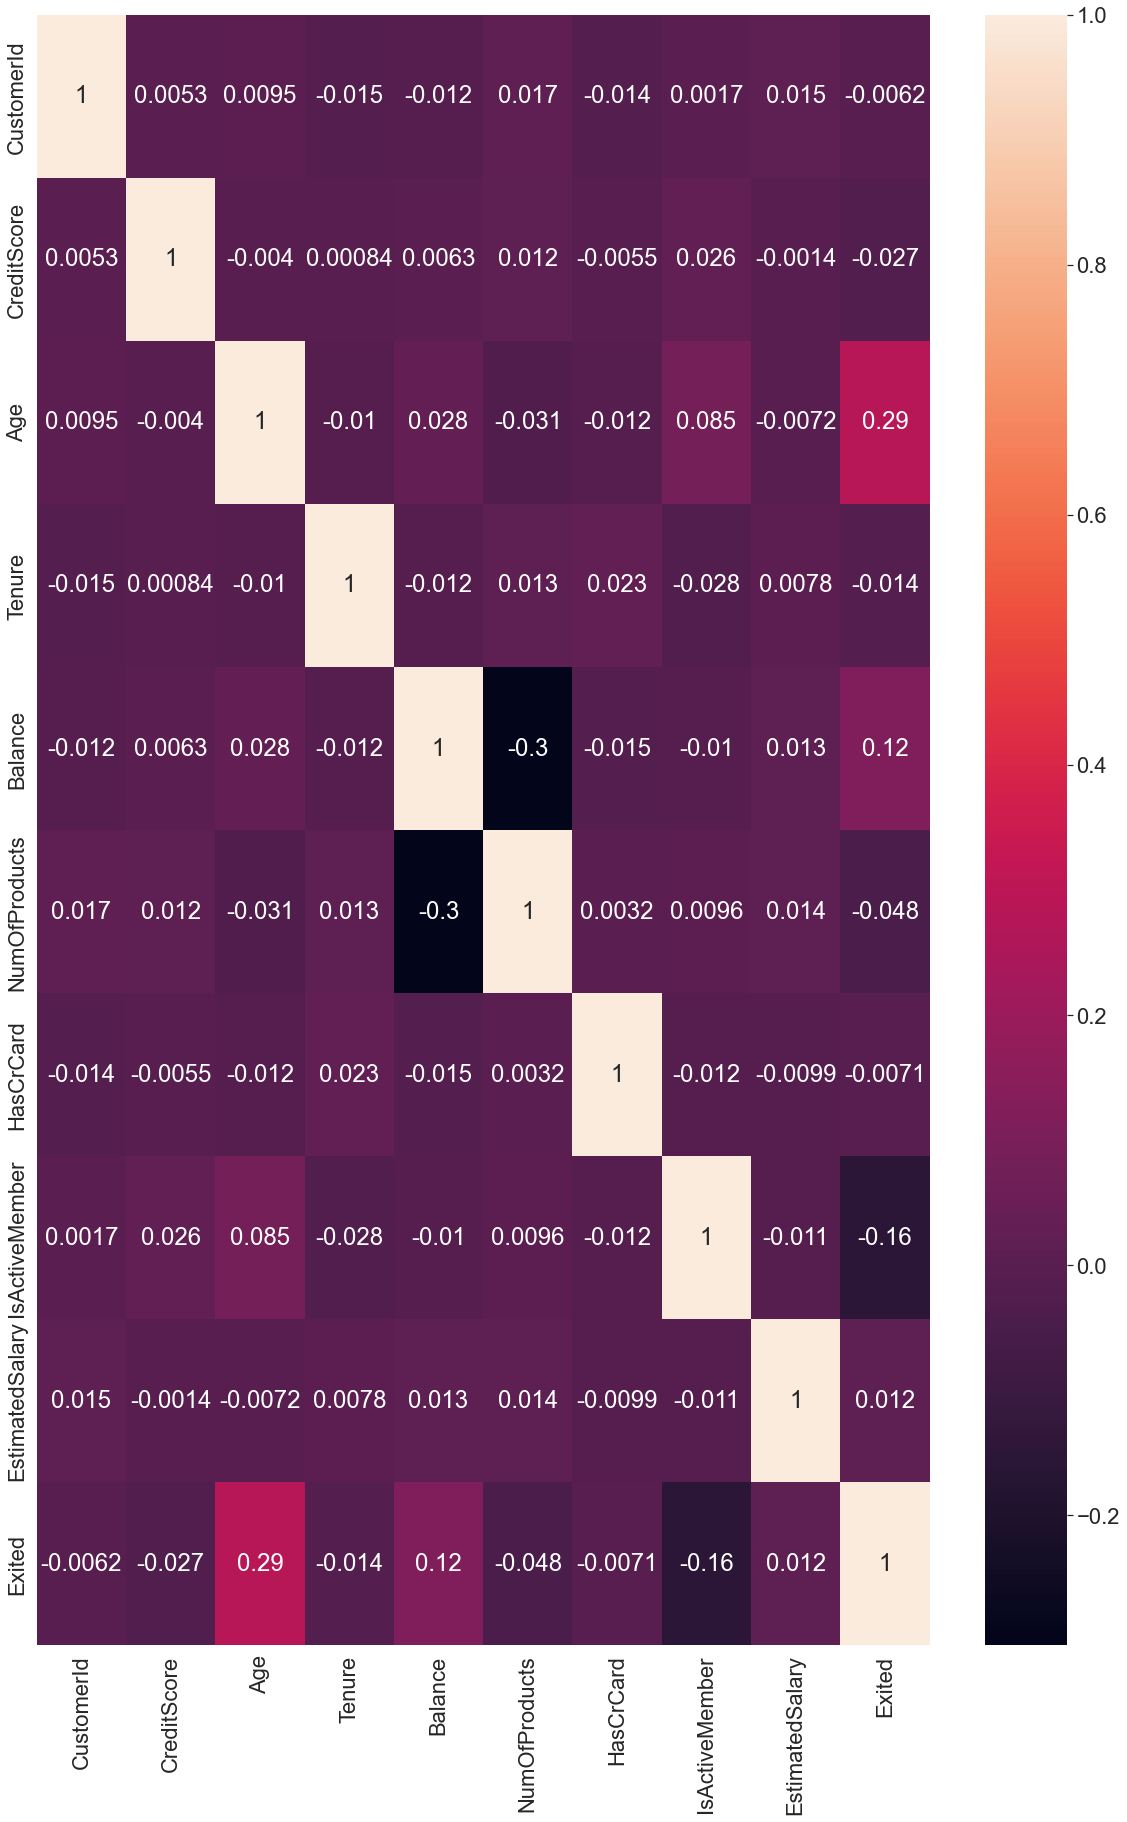

In [57]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(),annot=True)

## 4. Perform descriptive statistics on the dataset

In [58]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handling null values

In [59]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Here there are no null values hence no need of cleaning. Hence we can move to next step

## Find the outliers and replace the outliers

<AxesSubplot:xlabel='EstimatedSalary'>

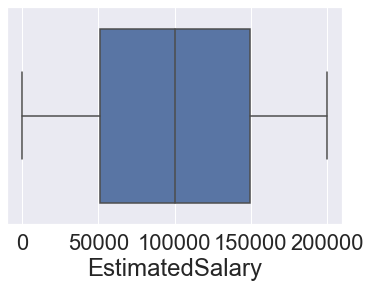

In [60]:
sns.boxplot(df.EstimatedSalary)

<AxesSubplot:xlabel='Balance'>

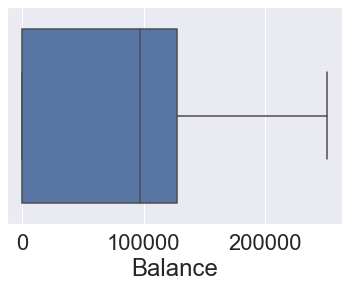

In [61]:
sns.boxplot(df.Balance)

<AxesSubplot:xlabel='CreditScore'>

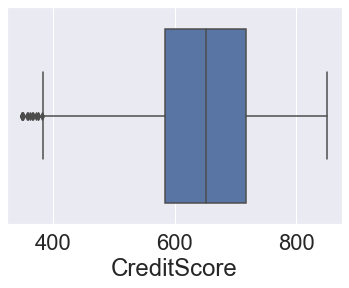

In [62]:
sns.boxplot(x=df["CreditScore"])

In [63]:
df.shape

(10000, 13)

In [64]:
p1=df.CreditScore.quantile(0.01)
df.CreditScore=np.where(df.CreditScore < p1,df.CreditScore.median(),df.CreditScore)


<AxesSubplot:xlabel='CreditScore'>

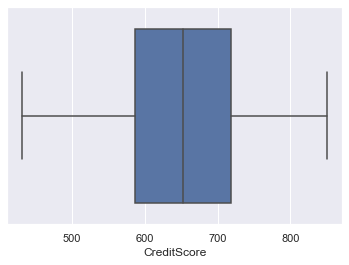

In [65]:
sns.set_theme(font_scale=1)
sns.boxplot(x=df.CreditScore)

In [66]:
df.shape

(10000, 13)

There are no outliiers in other continuous columns than `CreditScore`

## 7. Check for categorical columns and perform encoding

In [67]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
from sklearn.preprocessing import LabelEncoder
lEnc=LabelEncoder()
df.Geography=lEnc.fit_transform(df.Geography)
df.Gender=lEnc.fit_transform(df.Gender)
df.Surname=lEnc.fit_transform(df.Surname)

In [69]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0
5,15574012,537,645.0,2,1,44,8,113755.78,2,1,0,149756.71,1
6,15592531,177,822.0,0,1,50,7,0.00,2,1,1,10062.80,0
7,15656148,2000,652.0,1,0,29,4,115046.74,4,1,0,119346.88,1
8,15792365,1146,501.0,0,1,44,4,142051.07,2,0,1,74940.50,0
9,15592389,1081,684.0,0,1,27,2,134603.88,1,1,1,71725.73,0


## 8. Split the data

In [70]:
Y= df.EstimatedSalary
X=df.drop(columns=['EstimatedSalary'],axis=1)

In [71]:
Y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [72]:
X

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,1115,619.0,0,0,42,2,0.00,1,1,1,1
1,15647311,1177,608.0,2,0,41,1,83807.86,1,0,1,0
2,15619304,2040,502.0,0,0,42,8,159660.80,3,1,0,1
3,15701354,289,699.0,0,0,39,1,0.00,2,0,0,0
4,15737888,1822,850.0,2,0,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1999,771.0,0,1,39,5,0.00,2,1,0,0
9996,15569892,1336,516.0,0,1,35,10,57369.61,1,1,1,0
9997,15584532,1570,709.0,0,0,36,7,0.00,1,0,1,1
9998,15682355,2345,772.0,1,1,42,3,75075.31,2,1,0,1


## 9. Scale the independent variables

In [73]:
from sklearn.preprocessing import scale
scaled_X=pd.DataFrame(scale(X),columns=X.columns)
scaled_X

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,-0.783213,-0.464183,-0.362450,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,1.977165
1,-0.606534,-0.390911,-0.479986,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,-0.505775
2,-0.995885,0.628988,-1.612604,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,1.977165
3,0.144767,-1.440356,0.492355,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.505775
4,0.652659,0.371354,2.105801,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.177652,0.580534,1.261680,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.505775
9996,-1.682806,-0.203004,-1.463013,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,-0.505775
9997,-1.479282,0.073539,0.599206,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,1.977165
9998,-0.119356,0.989439,1.272366,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,1.977165


## 10. Split the data into training and testing

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaled_X,Y,test_size=0.3,random_state=0)

In [75]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(7000, 12) (3000, 12) (7000,) (3000,)


In [76]:
X_train

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
7681,-0.797032,-1.475810,-0.127379,-0.901886,0.912419,-0.564665,-1.041760,1.117213,0.807737,0.646092,0.970243,1.977165
9031,0.714314,-1.588081,-1.195886,-0.901886,0.912419,0.007457,0.687130,-1.225848,0.807737,0.646092,-1.030670,-0.505775
3691,0.963450,-0.240822,-0.672318,-0.901886,-1.095988,3.535540,-0.004426,1.354191,-0.911583,-1.547768,0.970243,-0.505775
202,-1.250707,-0.427547,-1.463013,1.515067,0.912419,1.056346,-0.004426,-1.225848,-0.911583,-1.547768,0.970243,1.977165
5625,-0.385174,-1.478173,-1.548493,-0.901886,-1.095988,2.009882,0.687130,1.070229,-0.911583,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...
9225,-1.473777,1.385344,-0.629577,0.306591,-1.095988,-0.660018,-0.350204,0.698607,0.807737,0.646092,0.970243,-0.505775
4859,-0.609314,1.530707,1.507437,1.515067,-1.095988,-1.613554,-0.350204,0.608299,-0.911583,0.646092,0.970243,-0.505775
3264,-1.620525,-0.361366,0.909073,-0.901886,0.912419,-0.373958,-0.004426,1.358909,0.807737,0.646092,-1.030670,-0.505775
9845,-0.374039,0.725896,-0.672318,1.515067,-1.095988,-0.087897,1.378686,-1.225848,0.807737,0.646092,0.970243,-0.505775


In [77]:
Y_train

7681     55796.83
9031     19823.02
3691     13848.58
202     146145.93
5625    129562.74
          ...    
9225    162961.79
4859    107753.07
3264    181429.87
9845    148750.16
2732    118855.26
Name: EstimatedSalary, Length: 7000, dtype: float64

In [78]:
X_test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9394,-1.045250,1.398344,-0.597522,0.306591,-1.095988,-0.373958,1.032908,0.875323,-0.911583,0.646092,0.970243,-0.505775
898,-0.503813,-0.782089,-1.388217,-0.901886,-1.095988,0.102810,-1.041760,0.424422,-0.911583,0.646092,-1.030670,1.977165
2398,-0.793292,0.412717,0.567151,1.515067,-1.095988,0.293517,1.032908,0.302927,-0.911583,0.646092,0.970243,-0.505775
5906,0.760190,1.590979,1.443327,-0.901886,0.912419,-0.660018,-0.350204,0.570464,-0.911583,-1.547768,-1.030670,-0.505775
2343,1.042107,-0.603636,0.567151,0.306591,0.912419,-0.087897,-0.004426,1.387129,0.807737,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,0.661806,-0.626091,-1.313422,1.515067,-1.095988,0.198164,-0.350204,-1.225848,0.807737,-1.547768,0.970243,-0.505775
7375,-0.723866,-1.266630,-0.148749,-0.901886,0.912419,3.630893,0.341352,0.071162,0.807737,0.646092,0.970243,-0.505775
9307,-0.146464,0.686897,0.342764,-0.901886,0.912419,0.102810,-1.041760,1.466728,0.807737,0.646092,0.970243,-0.505775
8394,-1.292287,-1.384811,0.417560,-0.901886,0.912419,2.868064,1.724464,1.257616,-0.911583,0.646092,0.970243,-0.505775


In [79]:
Y_test

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
4004    147606.71
7375     55829.25
9307    167400.29
8394     70849.47
5233     33759.41
Name: EstimatedSalary, Length: 3000, dtype: float64